In [ ]:
# Import Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


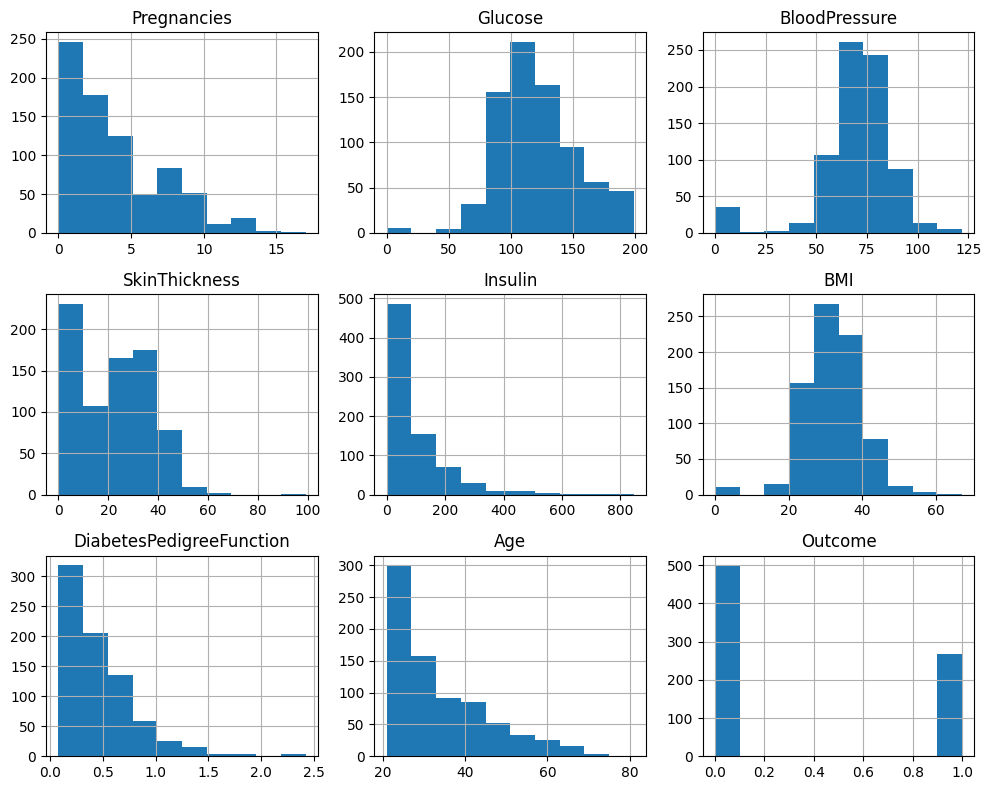

In [ ]:
# Visualize the distribution of numerical variables using histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

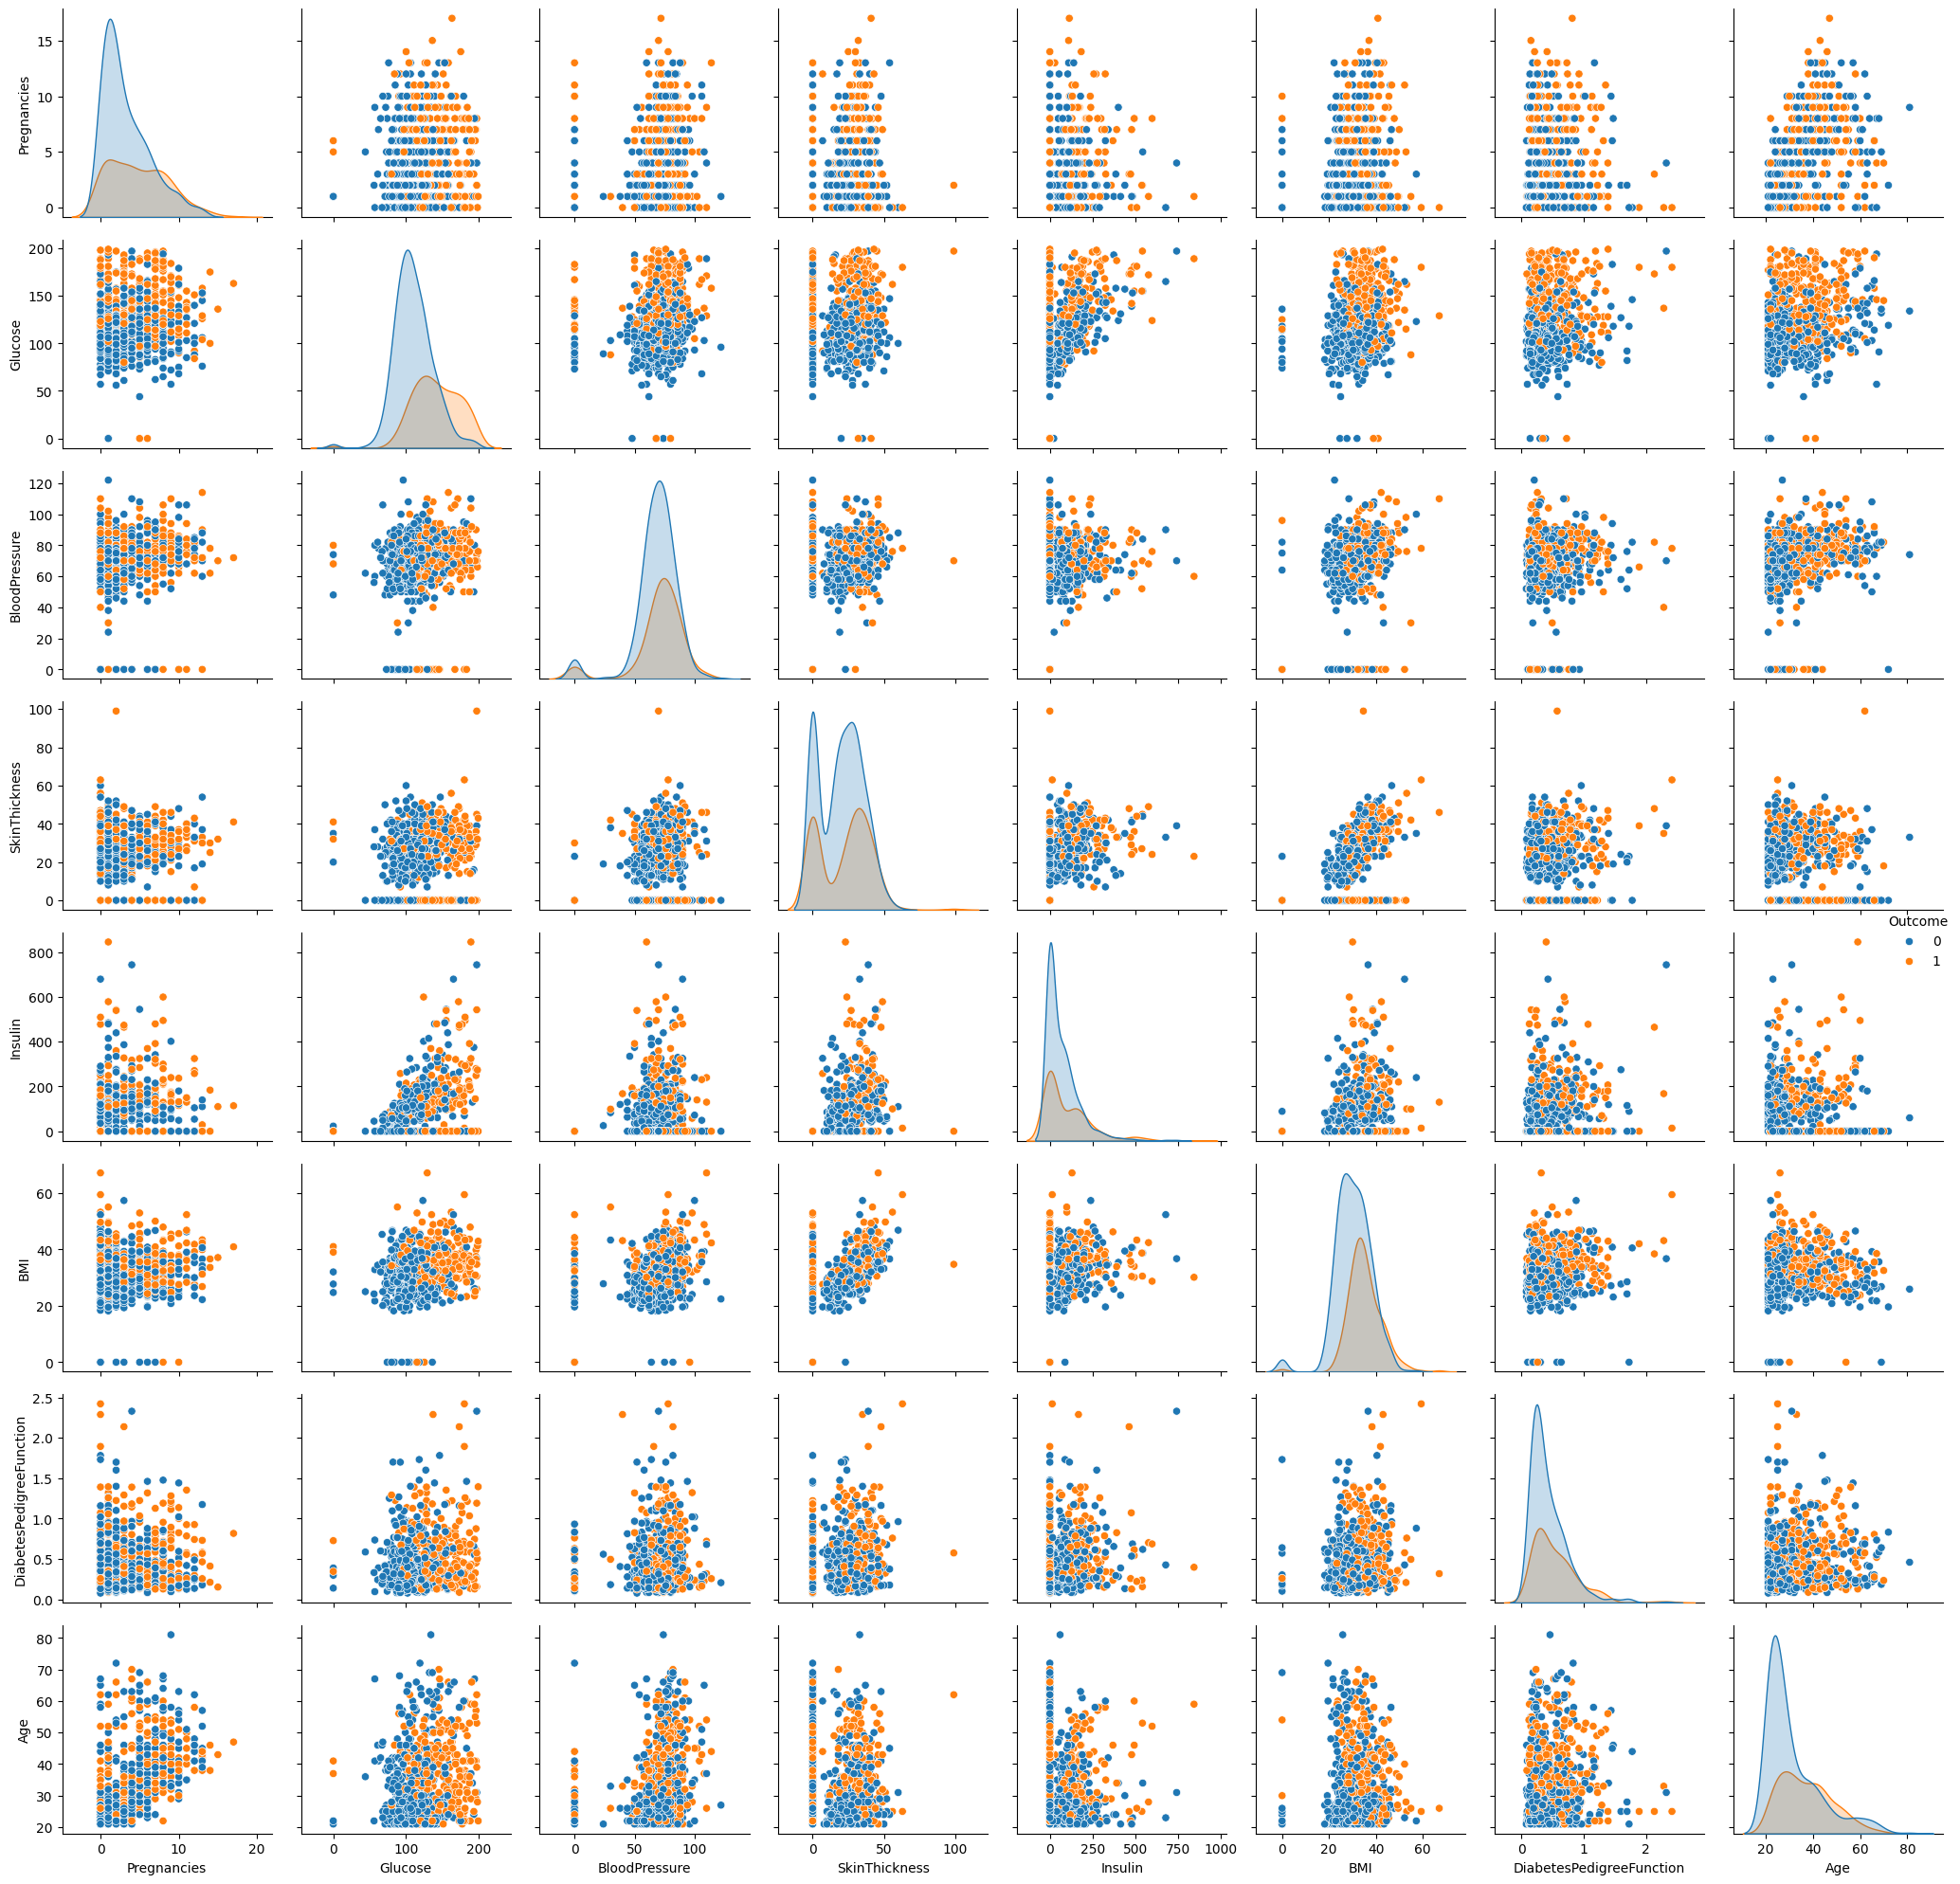

In [ ]:
# Visualize the relationships between variables using pairplot
sns.pairplot(df, hue='Outcome')
plt.tight_layout()
plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [ ]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Check for categorical variables
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
from scipy import stats
z_scores = stats.zscore(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])


In [ ]:
# Define threshold for z-score
threshold = 3

In [ ]:
# Identify rows with outlier values based on z-score threshold
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

In [ ]:
# Remove rows with outlier values
df_no_outliers_zscore = df[~outlier_indices]

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
what is random seed here?

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training set (80%) and test set (20%) with a random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.



In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# Define the decision tree model
model = DecisionTreeClassifier()

# Define hyperparameters to tune
params = {'max_depth': [3, 5, 7, 10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}


In [ ]:
# Use GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Train the decision tree model on the training set with optimized hyperparameters
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:

# Evaluate the model's performance on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.7597402597402597


Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1 Score: 0.6476190476190475


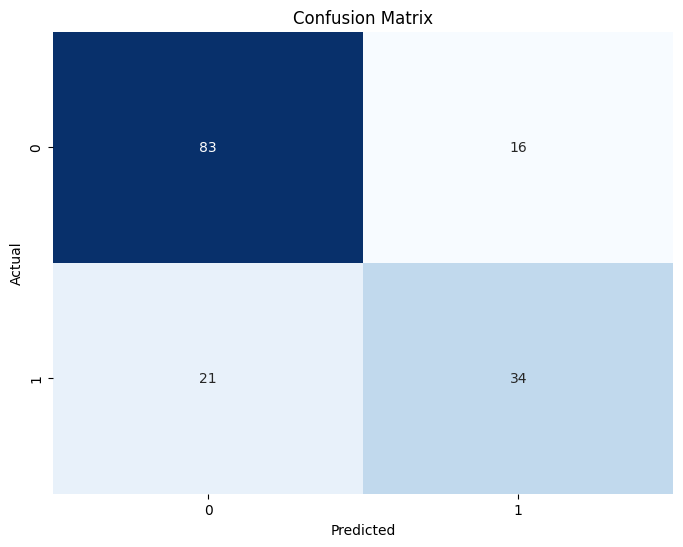

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Generate ROC curve and calculate AUC score
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

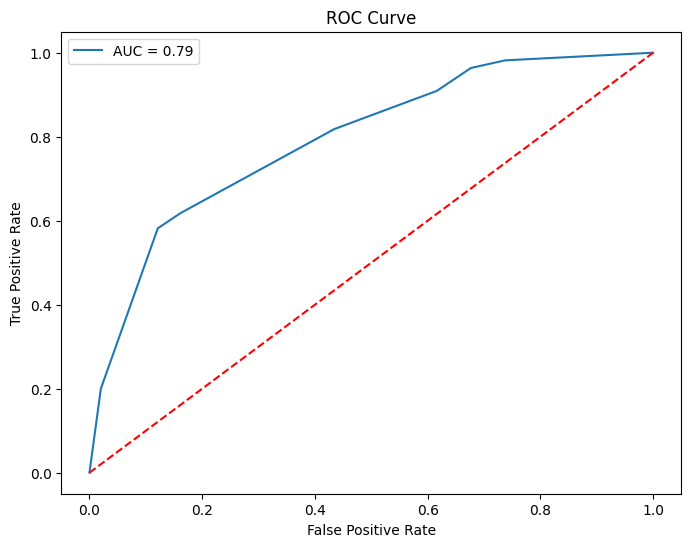

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [ ]:
# Get feature importances
feature_importances = best_model.feature_importances_

In [ ]:
# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Pregnancies: 0.0000
Glucose: 0.5974
BloodPressure: 0.0000
SkinThickness: 0.0000
Insulin: 0.0000
BMI: 0.2622
DiabetesPedigreeFunction: 0.0000
Age: 0.1405


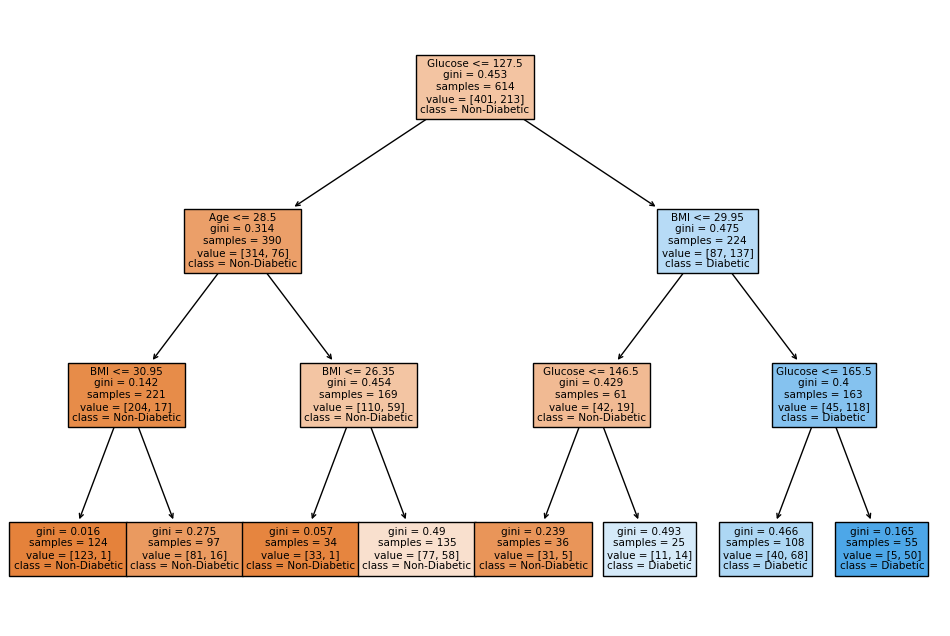

In [ ]:
# Visualize decision tree (optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier on the training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set (baseline performance)
baseline_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.8350


In [ ]:
# Sensitivity Analysis: Vary feature values and observe impact on predictions
feature_to_vary = 0  # Choose the feature index to vary (e.g., feature 0)
feature_values = [0, 1, 2]  # Example values to vary

for value in feature_values:
    X_test_sensitivity = X_test.copy()
    X_test_sensitivity[:, feature_to_vary] = value  # Set the feature value to the chosen value
    sensitivity_accuracy = accuracy_score(y_test, dt_model.predict(X_test_sensitivity))
    print(f"Sensitivity Analysis - Feature {feature_to_vary} Value {value}: {sensitivity_accuracy:.4f}")


In [ ]:
# Scenario Testing: Apply model to different datasets or conditions
# Here, we simulate a scenario where there's noise in the test data
X_test_noisy = X_test + 0.5 * np.random.randn(*X_test.shape)  # Add Gaussian noise
scenario_accuracy = accuracy_score(y_test, dt_model.predict(X_test_noisy))
print(f"Scenario Testing - Noisy Data Accuracy: {scenario_accuracy:.4f}")


Scenario Testing - Noisy Data Accuracy: 0.7500


In [ ]:
# Model Validation on New Data: Split the data into training/validation/test sets
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
# Train a new decision tree model on the training + validation data
dt_model_new = DecisionTreeClassifier(random_state=42)
dt_model_new.fit(X_train_new, y_train_new)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the new model's accuracy on the test set
new_model_accuracy = accuracy_score(y_test, dt_model_new.predict(X_test))
print(f"Model Validation on New Data - New Model Accuracy: {new_model_accuracy:.4f}")


Model Validation on New Data - New Model Accuracy: 0.8700
